<a href="https://colab.research.google.com/github/Auramariaar/Estimacion-de-Provisiones-en-Seguros/blob/main/crisp_methodolpgy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entedimiento del negocio**

# **Objetivos empresariales**
Basado en la información proporcionada sobre el desarrollo de un siniestro en
un seguro de P&C y los eventos asociados, se puede determinar el siguiente objetivo
general el cual se basa en asegurar la estabilidad financiera y la sostenibilidad de la
compañía de seguros.
En seguida podemos ver algunos objetivos empresariales:
1. Gestión de Reservas y Capital: El objetivo fundamental es garantizar que la
compañía de seguros tenga suficiente capital reservado para cubrir las reclama-
ciones futuras. Dado que las reclamaciones pueden tener retrasos en la notifica-
ción y en la liquidación, es crucial establecer reservas adecuadas para asegurar
que la compañía esté financieramente preparada para hacer frente a los pagos
futuros. Esto implica calcular y mantener reservas precisas y suficientes para
asegurar que la empresa cumpla con sus obligaciones hacia los asegurados.
2. Predicción de Reclamaciones y Costos: Un objetivo importante es desarro-
llar modelos y herramientas analíticas que permitan predecir con precisión
las reclamaciones futuras y los costos asociados. Esto implica utilizar métodos
estadísticos y matemáticos para estimar la probabilidad y el monto de las recla-
maciones pendientes, teniendo en cuenta los diferentes tiempos de demora y
liquidación. Estas predicciones ayudan a la compañía a planificar sus reservas
y recursos financieros de manera eficiente.
3. Optimización de la Política de Reservas: La compañía debe determinar la po-
lítica adecuada para establecer reservas en función de factores como el tipo de
reclamación, el historial de reclamaciones y el riesgo asociado. El objetivo aquí
es encontrar el equilibrio entre mantener suficientes reservas para la solven-
cia financiera y evitar la sobreestimación que podría afectar negativamente la
rentabilidad.
4. Gestión de Riesgos y Solvencia: La gestión adecuada de riesgos es crucial. La
compañía debe asegurarse de que las reservas sean suficientes para enfrentar
escenarios adversos, como aumentos inesperados en las reclamaciones. El ob-
jetivo es mantener la solvencia de la compañía y garantizar que pueda cumplir
con sus obligaciones incluso en situaciones de estrés financiero.
2
CAPÍTULO 1. ENTENDIMIENTO EMPRESARIAL 3
5. Eficiencia Operativa: La comprensión de los tiempos de demora en la noti-
ficación y liquidación de reclamaciones permite a la compañía optimizar sus
procesos operativos. Esto puede involucrar la identificación de áreas donde se
puede reducir la demora y mejorar la eficiencia en la liquidación de reclama-
ciones.
6. Desarrollo de Productos y Precios: Comprender los patrones de desarrollo
de siniestros y los tiempos de demora puede influir en el desarrollo de nuevos
productos y en la fijación de precios adecuados. Los datos sobre retrasos y liqui-
daciones pueden ser utilizados para establecer tarifas que reflejen con precisión
el riesgo y el perfil de la cartera de seguros.
En conjunto, los objetivos empresariales giran en torno a la gestión financiera
sólida, la predicción precisa de riesgos y costos, la optimización de las reservas y
la eficiencia operativa en el contexto de los seguros de propiedad y accidentes. Es-
tos objetivos trabajan en conjunto para asegurar que la compañía de seguros pueda
mantener su estabilidad financiera, cumplir con sus obligaciones y operar de manera
rentable en el mercado.

# **Entendimiento de los datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wkcomp_pos.csv')
print('Number of rows and columns:', data.shape)
data.columns

Number of rows and columns: (13200, 13)


Index(['GRCODE', 'GRNAME', 'AccidentYear', 'DevelopmentYear', 'DevelopmentLag',
       'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D', 'EarnedPremDIR_D',
       'EarnedPremCeded_D', 'EarnedPremNet_D', 'Single', 'PostedReserve97_D'],
      dtype='object')

In [3]:

#  Quitar duplicados en caso que hayan
data.drop_duplicates().shape

(13200, 13)

In [4]:
data.head(6).T

,0,1,2,3,4,5
GRCODE,86,86,86,86,86,86
GRNAME,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp,Allstate Ins Co Grp
AccidentYear,1988,1988,1988,1988,1988,1988
DevelopmentYear,1988,1989,1990,1991,1992,1993
DevelopmentLag,1,2,3,4,5,6
IncurLoss_D,367404,362988,347288,330648,354690,350092
CumPaidLoss_D,70571,155905,220744,251595,274156,287676
BulkLoss_D,127737,60173,27763,15280,27689,20641
EarnedPremDIR_D,400699,400699,400699,400699,400699,400699
EarnedPremCeded_D,5957,5957,5957,5957,5957,5957


In [5]:
# estadísticas de base: características nominales
data.describe(include=['object']).T

,count,unique,top,freq
GRNAME,13200,132,Allstate Ins Co Grp,100


In [6]:
# estadísticas básicas: características numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRCODE,13200.0,17153.053030,12512.206105,86.0,8526.0,14110.0,26983.25,44300.0
AccidentYear,13200.0,1992.500000,2.872390,1988.0,1990.0,1992.5,1995.00,1997.0
DevelopmentYear,13200.0,1997.000000,4.062173,1988.0,1994.0,1997.0,2000.00,2006.0
DevelopmentLag,13200.0,5.500000,2.872390,1.0,3.0,5.5,8.00,10.0
IncurLoss_D,13200.0,11532.048258,35595.560208,-59.0,0.0,544.0,6526.50,367404.0
CumPaidLoss_D,13200.0,8215.737348,25714.081464,-338.0,0.0,351.5,4565.00,325322.0
BulkLoss_D,13200.0,1570.125606,7259.022141,-4621.0,0.0,5.0,259.25,145296.0
EarnedPremDIR_D,13200.0,18438.469697,51830.703058,-6518.0,0.0,1419.0,11354.25,421223.0
EarnedPremCeded_D,13200.0,1812.338636,6666.663148,-3522.0,0.0,144.5,1141.00,78730.0
EarnedPremNet_D,13200.0,16626.128788,48941.724122,-9731.0,0.0,827.0,9180.50,418755.0


In [ ]:
#Contar valores faltantes
data.isnull().sum() #No hay

GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_D          0
CumPaidLoss_D        0
BulkLoss_D           0
EarnedPremDIR_D      0
EarnedPremCeded_D    0
EarnedPremNet_D      0
Single               0
PostedReserve97_D    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GRCODE             13200 non-null  int64 
 1   GRNAME             13200 non-null  object
 2   AccidentYear       13200 non-null  int64 
 3   DevelopmentYear    13200 non-null  int64 
 4   DevelopmentLag     13200 non-null  int64 
 5   IncurLoss_D        13200 non-null  int64 
 6   CumPaidLoss_D      13200 non-null  int64 
 7   BulkLoss_D         13200 non-null  int64 
 8   EarnedPremDIR_D    13200 non-null  int64 
 9   EarnedPremCeded_D  13200 non-null  int64 
 10  EarnedPremNet_D    13200 non-null  int64 
 11  Single             13200 non-null  int64 
 12  PostedReserve97_D  13200 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
print(data.skew())

GRCODE               0.560995
AccidentYear         0.000000
DevelopmentYear      0.000000
DevelopmentLag       0.000000
IncurLoss_D          5.400459
CumPaidLoss_D        5.847218
BulkLoss_D           9.233810
EarnedPremDIR_D      4.776148
EarnedPremCeded_D    8.060025
EarnedPremNet_D      4.926814
Single              -1.020737
PostedReserve97_D    5.923483
dtype: float64


Basándonos en los valores proporcionados:

Las columnas con coeficientes positivos como 'GRCODE', 'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D', 'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D' tienen distribuciones sesgadas hacia la derecha, lo que significa que tienen valores más altos concentrados en el extremo derecho.

La columna 'Single' tiene un coeficiente negativo, lo que indica que la distribución está sesgada hacia la izquierda, con más valores en el extremo izquierdo.

'DevelopmentLag' y 'PostedReserve97_D' tienen coeficientes cercanos a 0, lo que sugiere que sus distribuciones son aproximadamente simétricas.

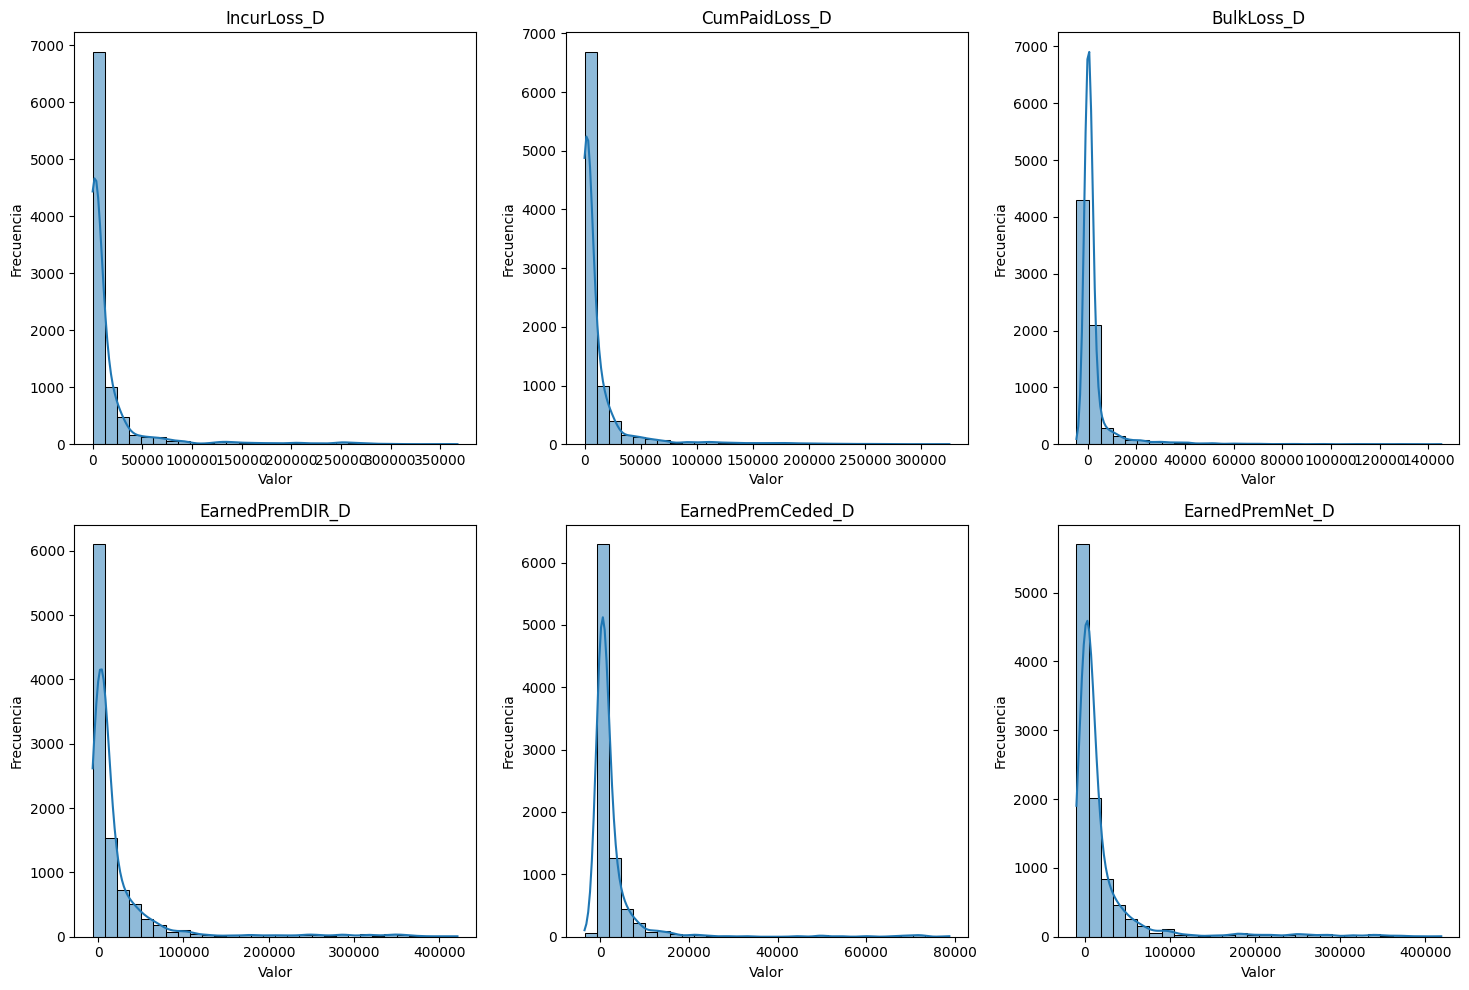

In [ ]:
money_columns = ["IncurLoss_D", "CumPaidLoss_D", "BulkLoss_D", "EarnedPremDIR_D", "EarnedPremCeded_D", "EarnedPremNet_D"]
filtered_data = data[data[money_columns] != 0].dropna()

# Histogramas
plt.figure(figsize=(15, 10))
for column in money_columns:
    non_zero_data = data[data[column] != 0]
    plt.subplot(2, 3, money_columns.index(column) + 1)
    sns.histplot(non_zero_data[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [24]:
# Obtener las columnas importantes excluyendo las primeras 5 y las últimas 5
columnas_importantes = data.columns.delete([0,1,2,3,4,-1,-2,-3,-4,-5])

# Crear un diccionario vacío para almacenar los datos completos
datos_completos = {columna: [] for columna in columnas_importantes}

# Obtener el número de filas en el DataFrame 'data'
tamano = data.shape[0]

In [25]:
# Inicializamos el diccionario DataComplete
DataComplete = {columna: [] for columna in Important_Variables}

# Iteramos sobre las Important_Variables
for Variable in Important_Variables:
    count = 0
    while (size - 100 * count > 1):
        base_Variable = np.zeros((10, 10))
        for i in range(10):
            for j in range(10):
                base_Variable[i][j] = data[Variable][i * 10 + j + 10 * count]
        count = count + 1
        # Agregamos la matriz base_Variable como un DataFrame a DataComplete
        DataComplete[Variable].append(pd.DataFrame(base_Variable))

In [26]:
# Define la función para graficar la serie
def DibujarGrafico(x, nombre):
    matriz = x.values
    plt.figure(figsize=(9, 7))
    plt.plot()

    for i in range(10):
        val = matriz[i]
        for j in range(0):
            val = val[:-1]
        rango = range(1988, 1988 + len(val))
        plt.plot(rango, val, marker='o', linestyle='-', label=1988 + i)

    plt.xlabel('Años')
    plt.ylabel('Valor')
    plt.title(nombre)

    plt.savefig(nombre, dpi=300, bbox_inches='tight')

    plt.legend()

In [27]:
# Diccionarios para almacenar las estadísticas
Medias_C = {}
Varianzas_C = {}
Minimos_C = {}
Maximos_C = {}
Medianas_C = {}

# Calcular las estadísticas para cada variable
for variable, array in DataComplete.items():
    # Concatenar los DataFrames en la lista
    df_concatenado = pd.concat(array)

    # Agrupar por nivel 0 y calcular las estadísticas
    Medias_C[variable] = df_concatenado.groupby(level=0).mean()
    Varianzas_C[variable] = df_concatenado.groupby(level=0).var()
    Minimos_C[variable] = df_concatenado.groupby(level=0).min()
    Maximos_C[variable] = df_concatenado.groupby(level=0).max()
    Medianas_C[variable] = df_concatenado.groupby(level=0).median()

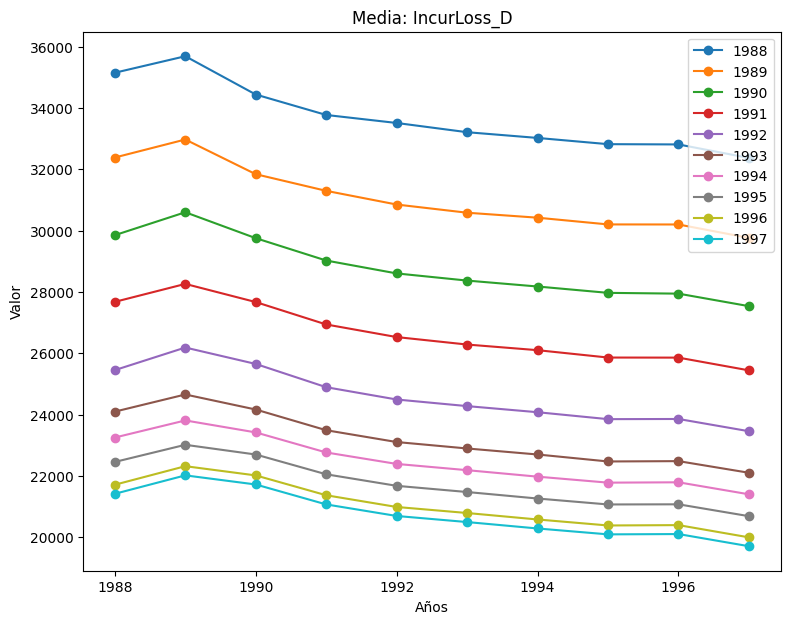

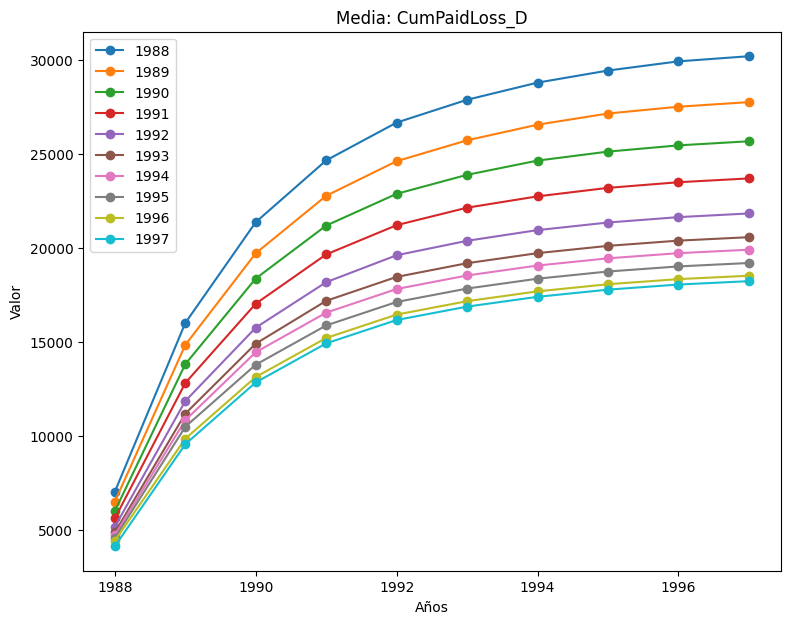

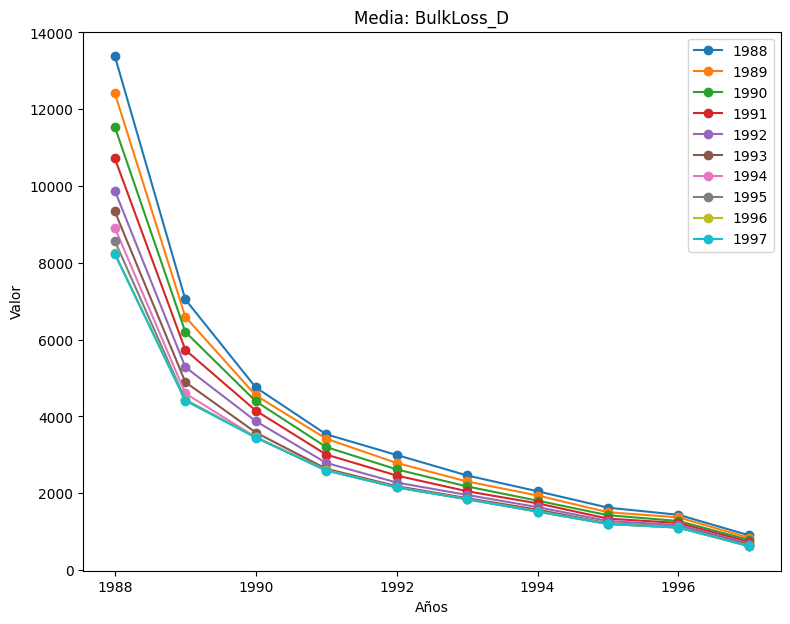

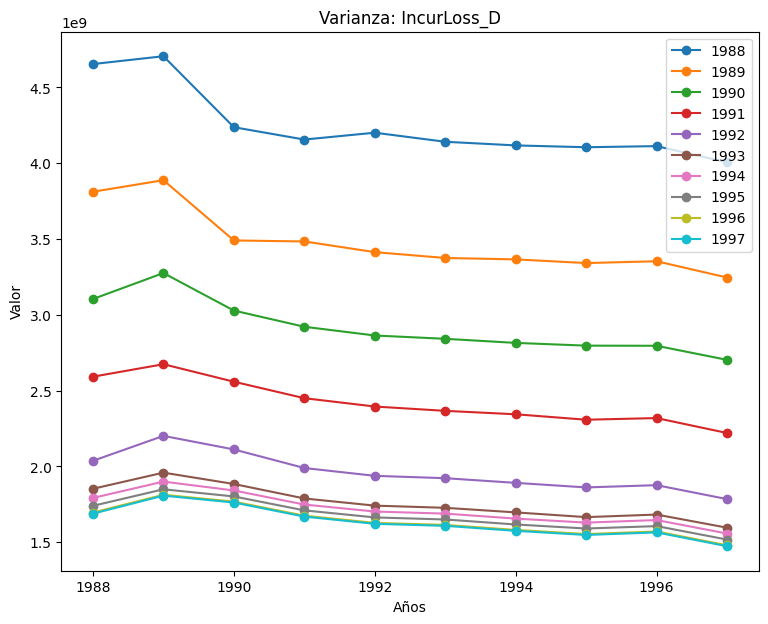

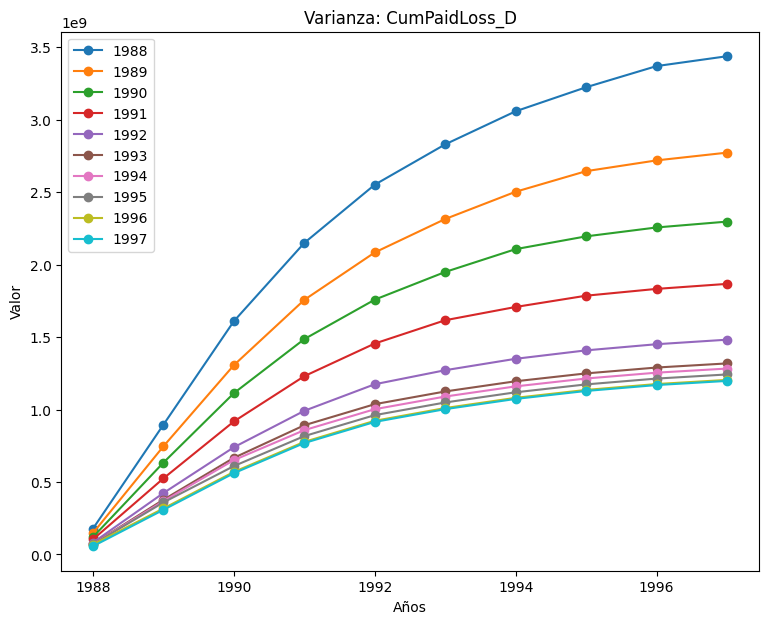

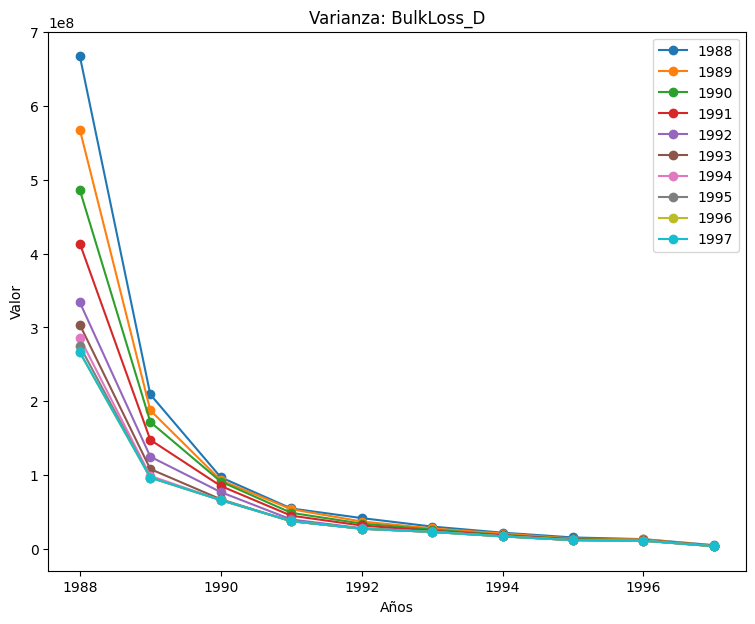

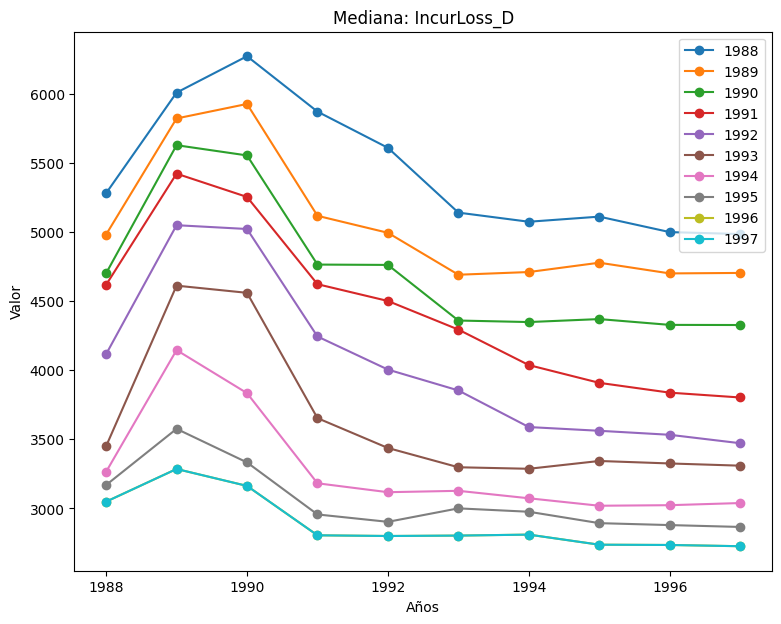

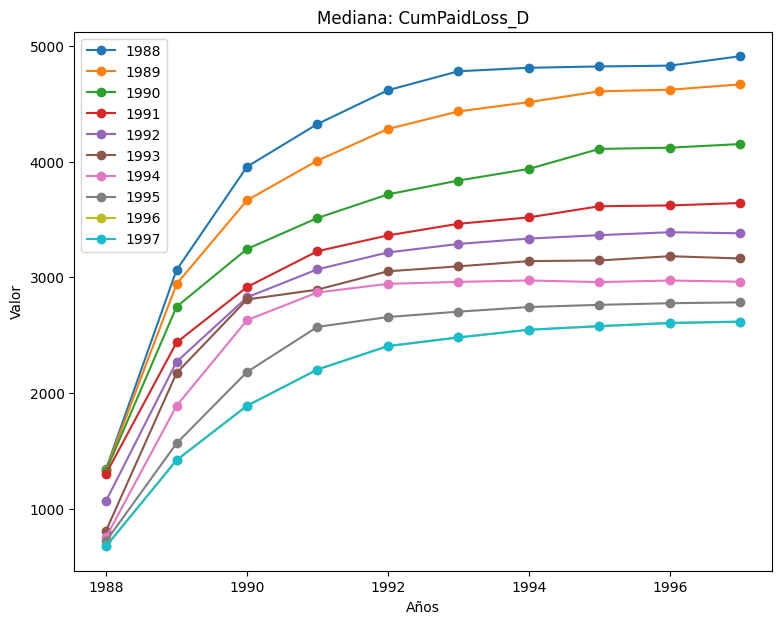

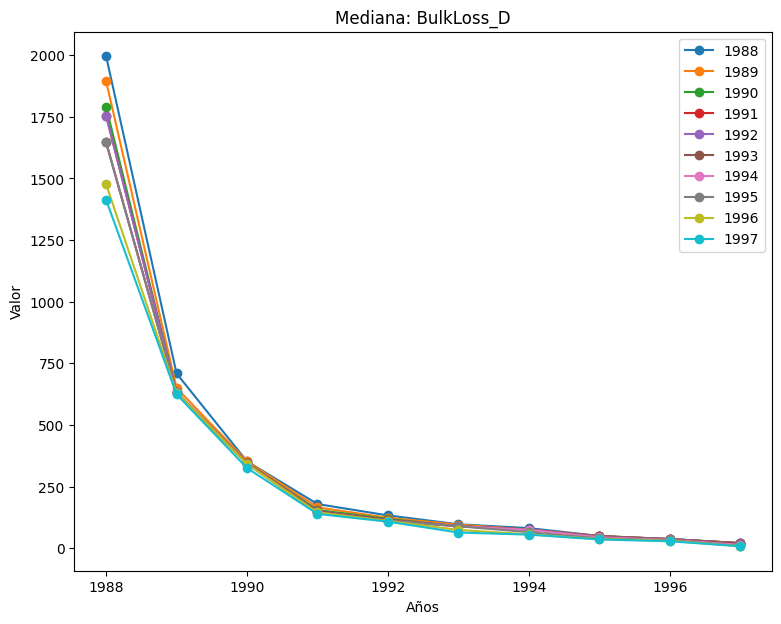

In [28]:
# Exportar los gráficos de las estadísticas básicas
for var in Important_Variables:
    DibujarGrafico(Medias_C[var], 'Media: ' + var)

for var in Important_Variables:
    DibujarGrafico(Varianzas_C[var], 'Varianza: ' + var)

for var in Important_Variables:
    DibujarGrafico(Medianas_C[var], 'Mediana: ' + var)

# Análisis de correlación

# PCA

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizar los datos numéricos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(data[columnas_importantes])

# Aplicar PCA
pca = PCA()
datos_pca = pca.fit_transform(datos_normalizados)

# Proporción de varianza explicada de los componentes PCA
varianza_explicada = pca.explained_variance_ratio_
print(varianza_explicada)

[0.82852076 0.16969919 0.00178005]


# **Preparación de los datos**

In [ ]:
Important_Variables = data.columns.delete([0,1,2,3,4,-1,-2,-3,-4,-5])
DataComplete = {column : [] for column in Important_Variables}
size = data.shape[0]

for Variable in Important_Variables:
  count = 0
  while(size - 100*count > 1):
    base_Variable = np.zeros((10,10))
    for i in range(10):
      for j in range(10):
        base_Variable[i][j] = data[Variable][i*10+j + 10*count]
    count = count + 1
    DataComplete[Variable].append(pd.DataFrame(base_Variable))

In [30]:
# Triángulos
def IncompleteDataFrame(x):
  matrix = x.values
  for i in range(9,0,-1):
    for j in range(10-i,10,1):
        matrix[i][j] = 0
  return pd.DataFrame(matrix)

Triangles = {}
for variable, array in DataComplete.items():
  Triangles[variable] = [IncompleteDataFrame(x) for x in array]

In [31]:
# Itera a través de los triángulos y muestra sus contenidos.
for variable, triangle_list in Triangles.items():
    print(f"Triángulos para la variable {variable}:")
    for year, triangle in enumerate(triangle_list):
        print(f"Año {year}:")
        print(triangle)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
4    0.0  
5    0.0  
6    0.0  
7    0.0  
8    0.0  
9    0.0  
Año 113:
        0       1       2       3       4       5       6       7       8  \
0  1355.0  1340.0  1067.0   923.0  1237.0  1257.0  1275.0  1297.0  1312.0   
1  1943.0  1294.0   824.0   946.0   917.0   911.0   919.0   920.0   894.0   
2  2018.0  1981.0  2188.0  2096.0  2017.0  2039.0  2090.0  2113.0     0.0   
3  1724.0  1340.0  1605.0  1772.0  1771.0  2027.0  2022.0     0.0     0.0   
4    36.0    20.0    15.0    14.0    15.0    13.0     0.0     0.0     0.0   
5     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7     2.0    11.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
8     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

        9 

In [32]:
#Estadísticas básicas de los triángulos
Means = {}
for variable, array in Triangles.items():
  Means[variable] = pd.concat(array).groupby(level=0).mean()

Var = {}
for variable, array in Triangles.items():
  Var[variable] = pd.concat(array).groupby(level=0).var()

Min = {}
for variable, array in Triangles.items():
  Min[variable] = pd.concat(array).groupby(level=0).min()

Max = {}
for variable, array in Triangles.items():
  Max[variable] = pd.concat(array).groupby(level=0).max()

Median = {}
for variable, array in Triangles.items():
  Median[variable] = pd.concat(array).groupby(level=0).median()

In [33]:
def DrawGraph(x, name):
  matrix = x.values
  plt.figure(figsize=(9, 7))
  plt.plot()

  for i in range(10):
    val = matrix[i]
    for j in range(i):
      val = val[:-1]
    rang = range(1988,1988+len(val))
    plt.plot(rang, val, marker='o', linestyle='-', label=1988+i)

  plt.xlabel('Years')
  plt.ylabel('Value')
  plt.title(name)

  plt.savefig(name, dpi=300, bbox_inches='tight')

  plt.legend()

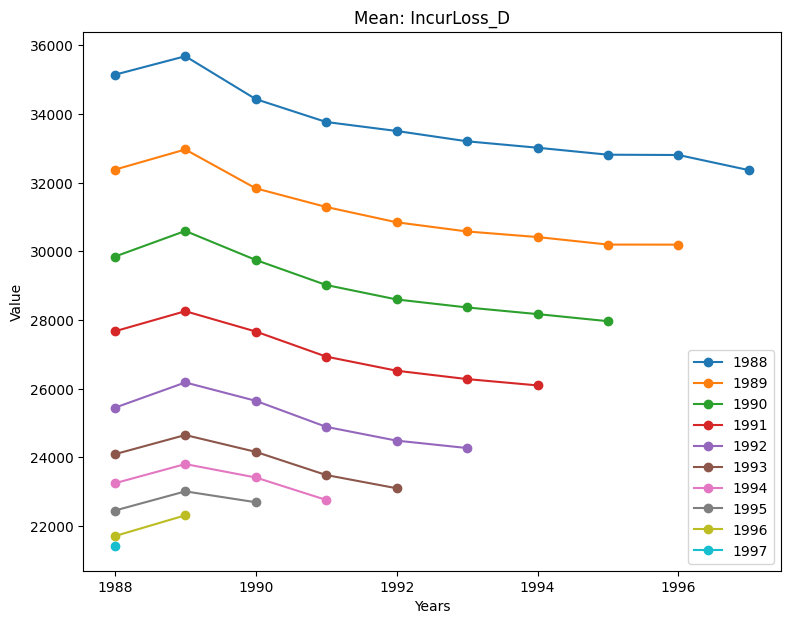

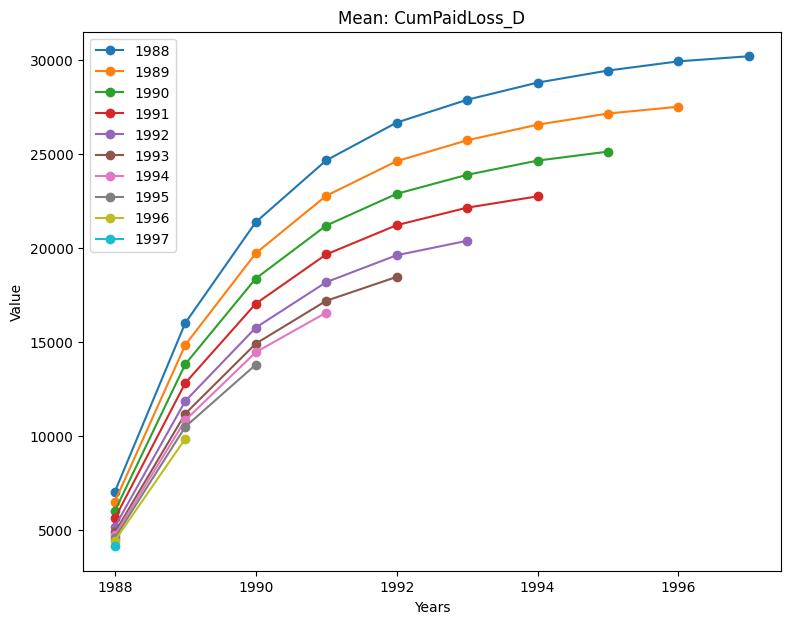

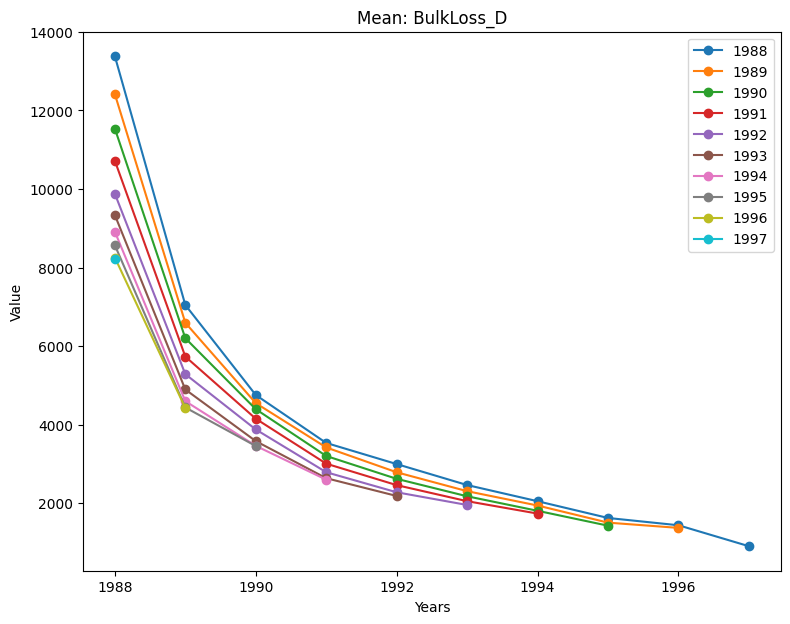

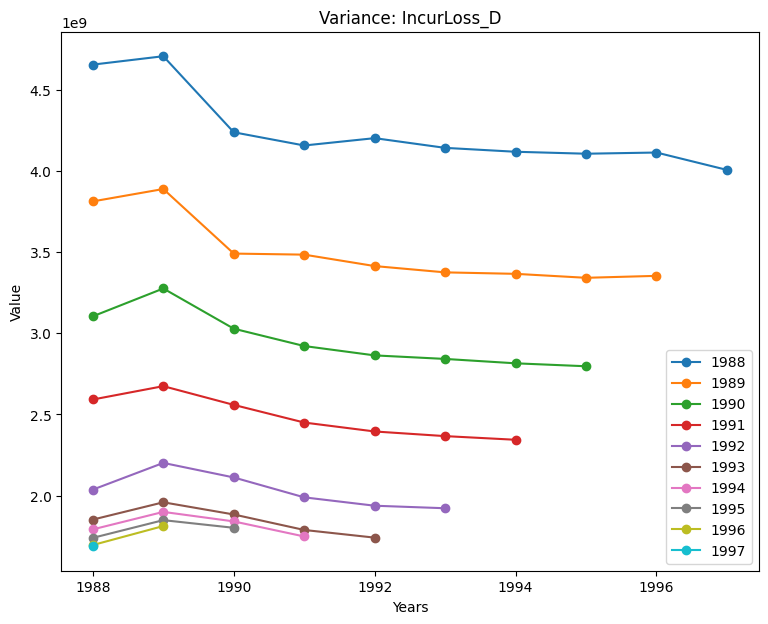

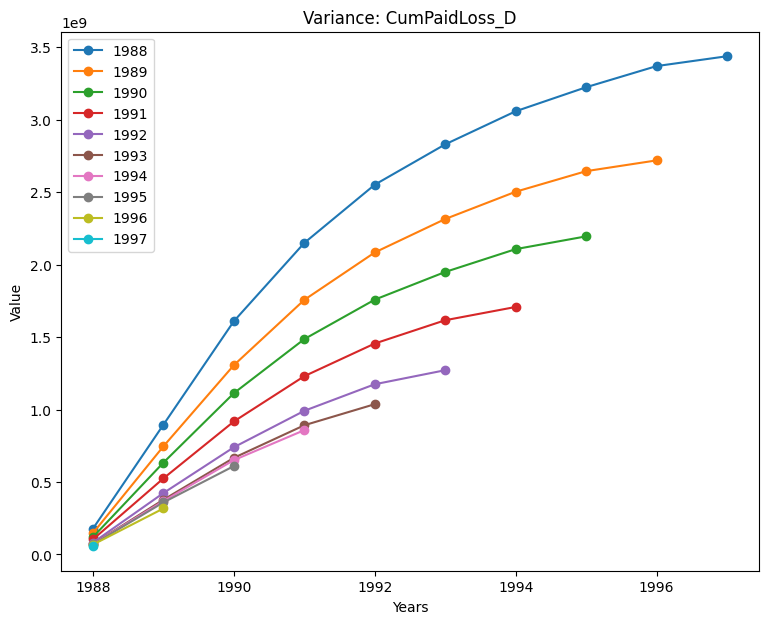

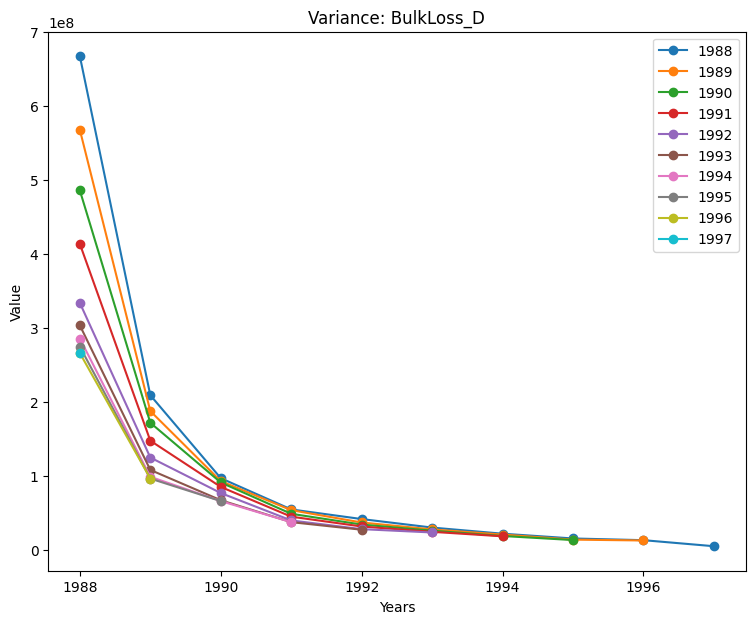

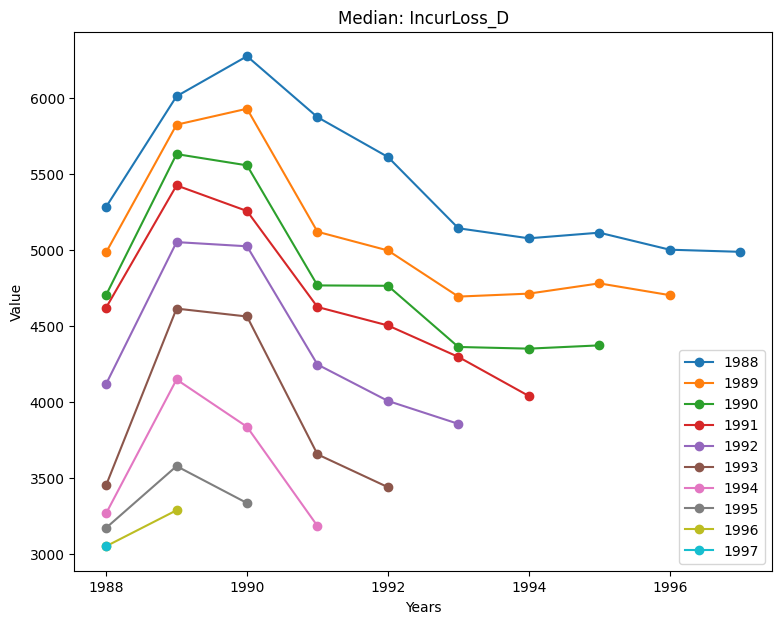

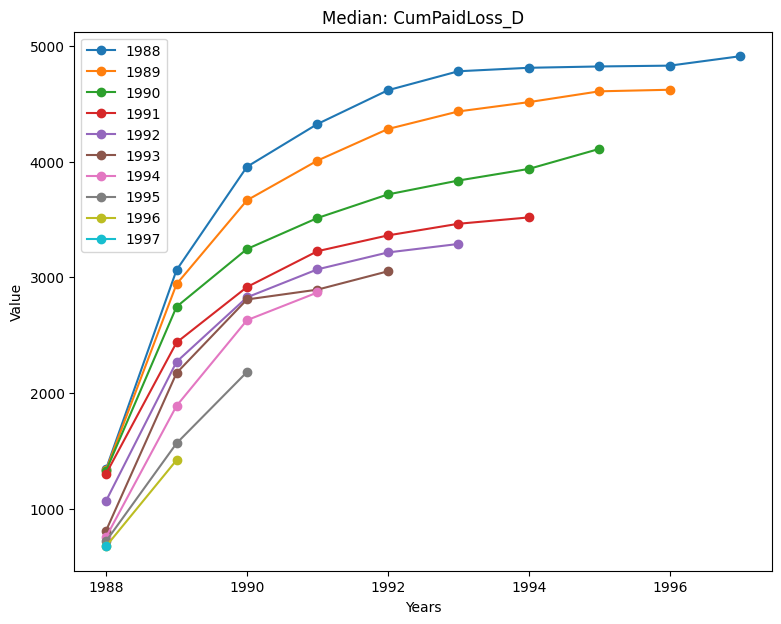

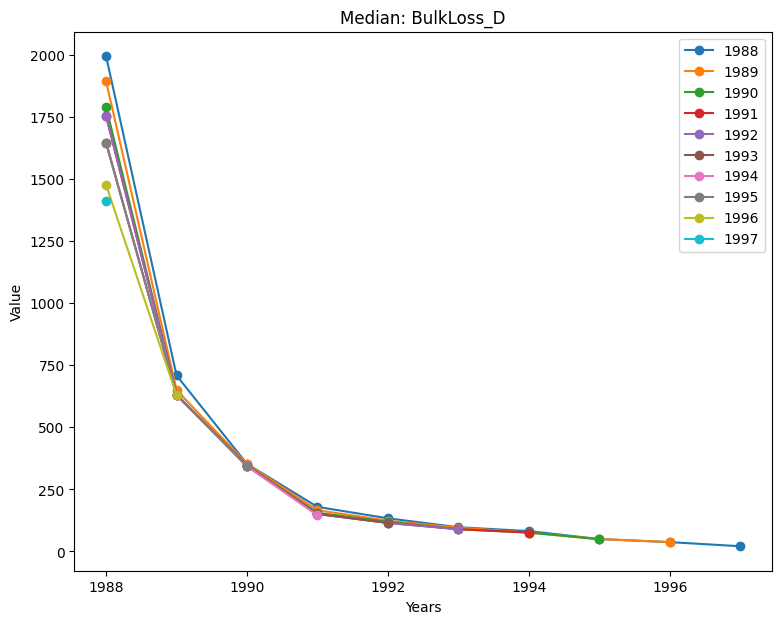

In [34]:
# Export the graphs of the basis statistics
for var in Important_Variables:
  DrawGraph(Means[var], 'Mean: ' + var)

for var in Important_Variables:
  DrawGraph(Var[var], 'Variance: ' + var)

for var in Important_Variables:
  DrawGraph(Median[var], 'Median: ' + var)

In [ ]:
# PCA
from sklearn.decomposition import PCA

def dataframe_to_pca(dataframes, n_components):

  X = np.array([])
  for i in range(len(dataframes)):
    flattened_vector = dataframes[i].values.flatten()
    X = np.append(X, flattened_vector)

  X = X.reshape(len(dataframes), -1)

  pca = PCA(n_components=n_components)
  pca_result = pca.fit_transform(X)

  return pca_result

# **Modelo Chainladder**

In [35]:
def calculate_chain_ladder_factors(triangle):
    factors = []
    for i in range(triangle.shape[1] - 1):
        column_sum = triangle.iloc[:, i].sum()
        next_column_sum = triangle.iloc[:, i + 1].sum()
        if column_sum != 0:
            # Calculate the development factor for the next column
            factors.append(next_column_sum / column_sum)
        else:
            # If the current column sum is zero, use a factor of 1 to avoid division by zero
            factors.append(1)
    return factors

def complete_triangle(triangle):
    factors = calculate_chain_ladder_factors(triangle)
    n_rows, n_cols = triangle.shape

    for i in range(n_rows):
        for j in range(n_cols - i, n_cols):
            if j < n_cols - 1:
                # For non-final columns, use the corresponding development factor
                triangle.iloc[i, j] = triangle.iloc[i, j - 1] * factors[j - 1]
            else:
                # For the last column, use the last available development factor
                if i > 0:
                    triangle.iloc[i, j] = triangle.iloc[i - 1, j] * factors[-1]

    return triangle

In [36]:
Triangles_C_CL = {}

for variable, array in Triangles.items():
    Triangles_C_CL[variable] = [complete_triangle(df.copy()) for df in array]

In [37]:
print(Triangles['BulkLoss_D'][0])

          0        1        2        3        4        5        6        7  \
0  127737.0  60173.0  27763.0  15280.0  27689.0  20641.0  14513.0  15862.0   
1  116172.0  52298.0  20543.0  28846.0  22033.0  17174.0  17851.0  10305.0   
2  108959.0  62543.0  32561.0  25858.0  21189.0  16645.0   9428.0  11861.0   
3  112836.0  60251.0  37066.0  28931.0  24175.0  12850.0  12899.0      0.0   
4   73135.0  52160.0  39554.0  20231.0  12532.0  11114.0      0.0      0.0   
5   57891.0  39773.0  16188.0   5161.0   3768.0      0.0      0.0      0.0   
6   47405.0  22605.0   1704.0    537.0      0.0      0.0      0.0      0.0   
7   42787.0   3054.0    469.0      0.0      0.0      0.0      0.0      0.0   
8    5665.0   1788.0      0.0      0.0      0.0      0.0      0.0      0.0   
9    3547.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

         8       9  
0   8974.0  8843.0  
1  12520.0     0.0  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     

# **Modelos Regresión Lineal**

In [38]:
import statsmodels.api as sm

def linear_model(triangle):
    # Convert to DataFrame for easier handling
    triangle_df = pd.DataFrame(triangle)

    # Prepare data for regression
    rows, cols = triangle_df.shape
    design_matrix = []
    y_values = []

    # Create design matrix and y vector
    for i in range(rows):
        for j in range(cols):
            value = triangle_df.iloc[i, j]
            if pd.notnull(value) and value > 0:
                row_indicator = [1 if k == i else 0 for k in range(1, rows)]
                col_indicator = [1 if l == j else 0 for l in range(1, cols)]
                design_matrix.append([1] + row_indicator + col_indicator)  # Intercept + row + col
                y_values.append(np.log(value))

    design_matrix = np.array(design_matrix)
    y_values = np.array(y_values)

    # Check if there is data for the model
    if design_matrix.size == 0 or y_values.size == 0:
        return triangle_df  # Return the original triangle if there is no data for the model

    # Fit the linear regression model
    model = sm.OLS(y_values, design_matrix).fit()

    # Fill missing values in the triangle
    for i in range(rows):
        for j in range(cols):
            if pd.isnull(triangle_df.iloc[i, j]) or triangle_df.iloc[i, j] <= 0:
                predictors = np.array([1] + [1 if k == i else 0 for k in range(1, rows)] +
                                      [1 if l == j else 0 for l in range(1, cols)])
                predicted_log_value = predictors.dot(model.params)
                predicted_value = np.exp(predicted_log_value)

                triangle_df.iloc[i, j] = predicted_value

    return pd.DataFrame(triangle_df)

In [39]:
Triangles_C_LM = {}
for variable, array in Triangles.items():
    Triangles_C_LM[variable] = [linear_model(df.copy()) for df in array]

# **Evaluación**

In [40]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {}
    for variable in data_complete.keys():
        errors[variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            error = error_func(actual_df.values, predicted_df.values)
            errors[variable].append(error)
    return errors

# Calcular errores MAPE y MSE para Chain Ladder
mape_errors_cl = calculate_errors_for_all_variables(DataComplete, Triangles_C_CL, calculate_mape)
mse_errors_cl = calculate_errors_for_all_variables(DataComplete, Triangles_C_CL, calculate_mse)

# Calcular errores MAPE y MSE para Linear Model
mape_errors_lm = calculate_errors_for_all_variables(DataComplete, Triangles_C_LM, calculate_mape)
mse_errors_lm = calculate_errors_for_all_variables(DataComplete, Triangles_C_LM, calculate_mse)

# Imprimir resultados
print("MAPE Errors - Chain Ladder Method:")
print(mape_errors_cl)
print("\nMSE Errors - Chain Ladder Method:")
print(mse_errors_cl)
print("\nMAPE Errors - Linear Model Method:")
print(mape_errors_lm)
print("\nMSE Errors - Linear Model Method:")
print(mse_errors_lm)

MAPE Errors - Chain Ladder Method:
{'IncurLoss_D': [1.182701543223015e+22, 9.905626709650018e+21, 8.932822913998954e+21, 8.545990307053544e+21, 7.982441265246164e+21, 6.674090854449273e+21, 6.71341605019661e+21, 6.626070043974922e+21, 6.634179978227501e+21, 5.195614222556009e+21, 5.880769452455812e+21, 4.686481666095331e+21, 3.885229358901125e+21, 3.306152822469692e+21, 2.614253367945478e+21, 2.0747253617397947e+21, 1.4723883222379914e+21, 1.1560017066055989e+21, 9.357831780022536e+20, 1.9107305079355927e+21, 2.2841311451900792e+20, 9.155160028412802e+20, 1.278946473386115e+21, 1.5942053109716348e+21, 2.3520572530642418e+21, 3.44018452144828e+21, 5.20490927702761e+21, 7.235172564636185e+21, 9.542691898531017e+21, 1.217026028128954e+22, 1.4971204831582112e+22, 1.1793542379611743e+22, 8.868067277103489e+21, 6.664650051392504e+21, 4.678795304406718e+21, 3.066362495909347e+21, 1.8271958428993022e+21, 9.235663876555757e+20, 5.246996136728966e+20, 7.692643205837602e+21, 7.241081753811392e+16

In [41]:
def calculate_average_errors(error_dict):
    average_errors = {}
    for variable, errors in error_dict.items():
        average_errors[variable] = np.mean(errors)
    return average_errors

# Calcular los errores promedio para cada modelo
average_mape_errors_cl = calculate_average_errors(mape_errors_cl)
average_mse_errors_cl = calculate_average_errors(mse_errors_cl)
average_mape_errors_lm = calculate_average_errors(mape_errors_lm)
average_mse_errors_lm = calculate_average_errors(mse_errors_lm)

# Comparar errores promedio y determinar el mejor modelo
def compare_models(average_errors_cl, average_errors_lm):
    better_model = {}
    for variable in average_errors_cl.keys():
        if average_errors_cl[variable] < average_errors_lm[variable]:
            better_model[variable] = 'Chain Ladder'
        else:
            better_model[variable] = 'Linear Model'
    return better_model

# Aplicar la comparación para MAPE y MSE
better_model_mape = compare_models(average_mape_errors_cl, average_mape_errors_lm)
better_model_mse = compare_models(average_mse_errors_cl, average_mse_errors_lm)

print("Better Model based on MAPE:")
print(better_model_mape)
print("\nBetter Model based on MSE:")
print(better_model_mse)

Better Model based on MAPE:
{'IncurLoss_D': 'Chain Ladder', 'CumPaidLoss_D': 'Chain Ladder', 'BulkLoss_D': 'Linear Model'}

Better Model based on MSE:
{'IncurLoss_D': 'Chain Ladder', 'CumPaidLoss_D': 'Chain Ladder', 'BulkLoss_D': 'Linear Model'}


In [42]:
def calculate_global_average_error(error_dict):
    total_error = 0
    count = 0
    for errors in error_dict.values():
        total_error += sum(errors)
        count += len(errors)
    return total_error / count if count > 0 else None

# Calcular el error promedio global para cada modelo
global_average_mape_cl = calculate_global_average_error(mape_errors_cl)
global_average_mse_cl = calculate_global_average_error(mse_errors_cl)
global_average_mape_lm = calculate_global_average_error(mape_errors_lm)
global_average_mse_lm = calculate_global_average_error(mse_errors_lm)

# Determinar el mejor modelo en general
def determine_best_model(average_cl, average_lm):
    return 'Chain Ladder' if average_cl < average_lm else 'Linear Model'

best_model_mape = determine_best_model(global_average_mape_cl, global_average_mape_lm)
best_model_mse = determine_best_model(global_average_mse_cl, global_average_mse_lm)

print(f"Best Model based on Global Average MAPE: {best_model_mape}")
print(f"Best Model based on Global Average MSE: {best_model_mse}")

Best Model based on Global Average MAPE: Linear Model
Best Model based on Global Average MSE: Linear Model
